In [32]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(1, "../../")
import matplotlib.pyplot as plt

from rl_research.utils import plot_scores_grid

In [33]:
exp = ['grid_length10_2', 'grid_length15_3', 'grid_length20_1']
exp_map = {
    'grid_length10_2': '10',
    'grid_length15_3': '15',
    'grid_length20_1': '20'
}

In [34]:
algos = ['reinforce_res', 'reinforce_res_st', 'reinforce_res_seq']

mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [35]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

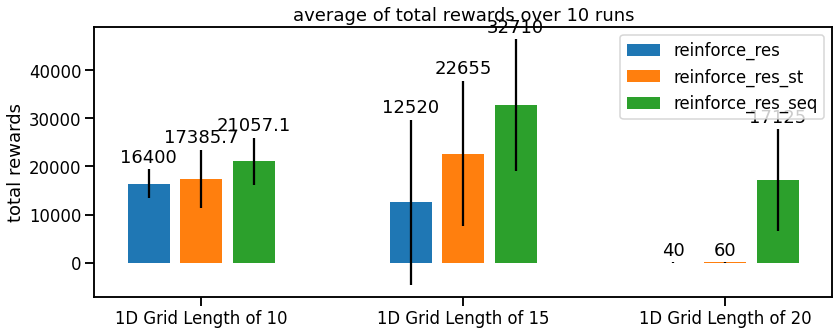

In [36]:
labels = [f'1D Grid Length of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 5))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    ax.bar_label(rect, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()

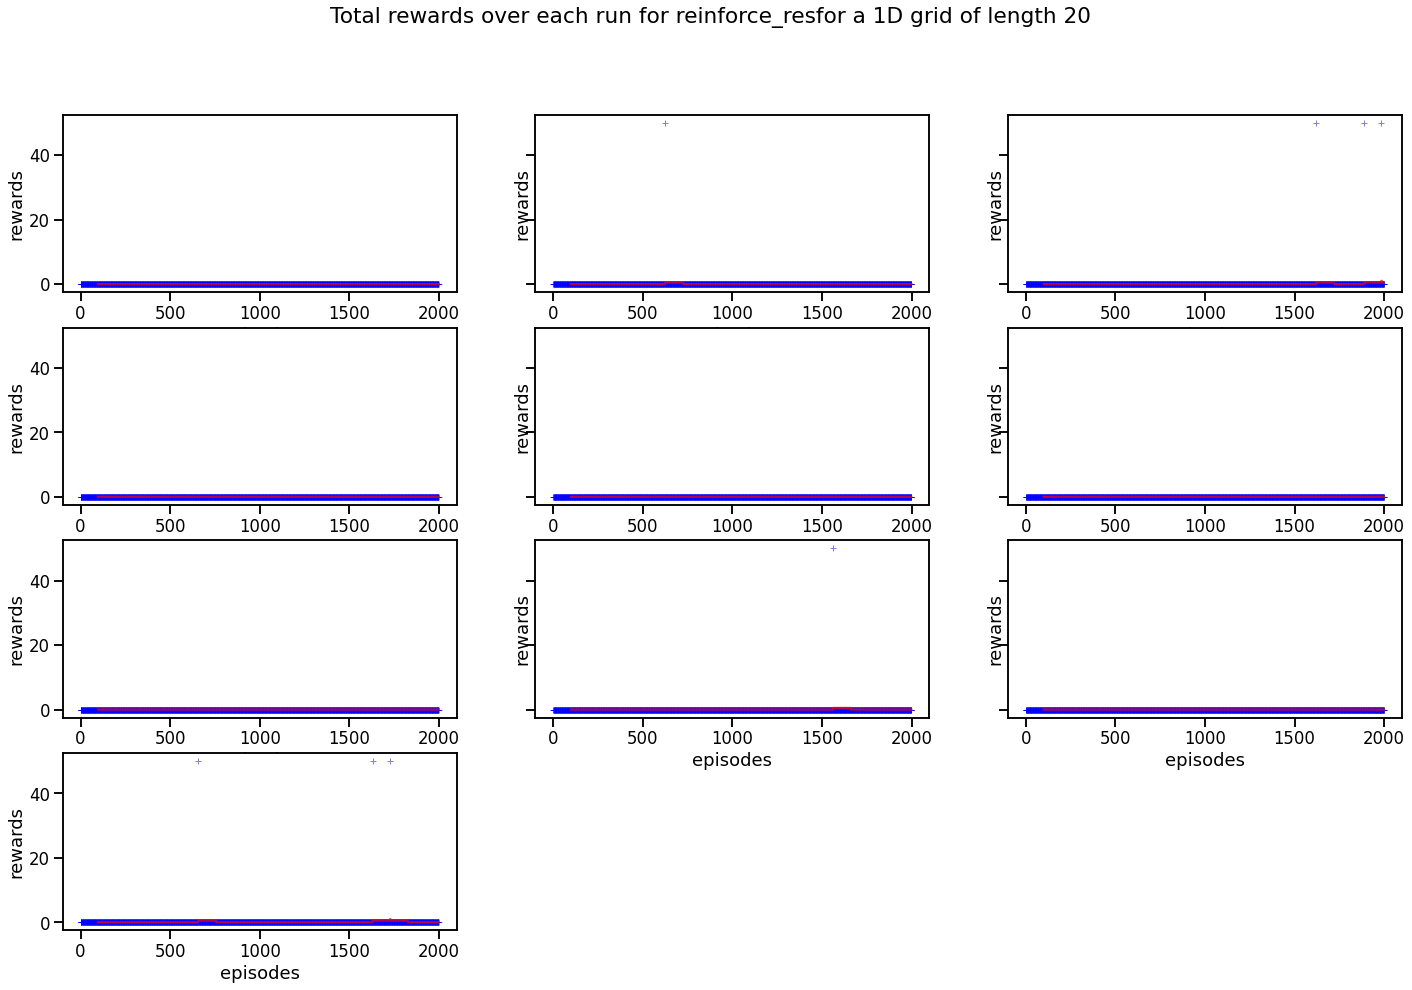

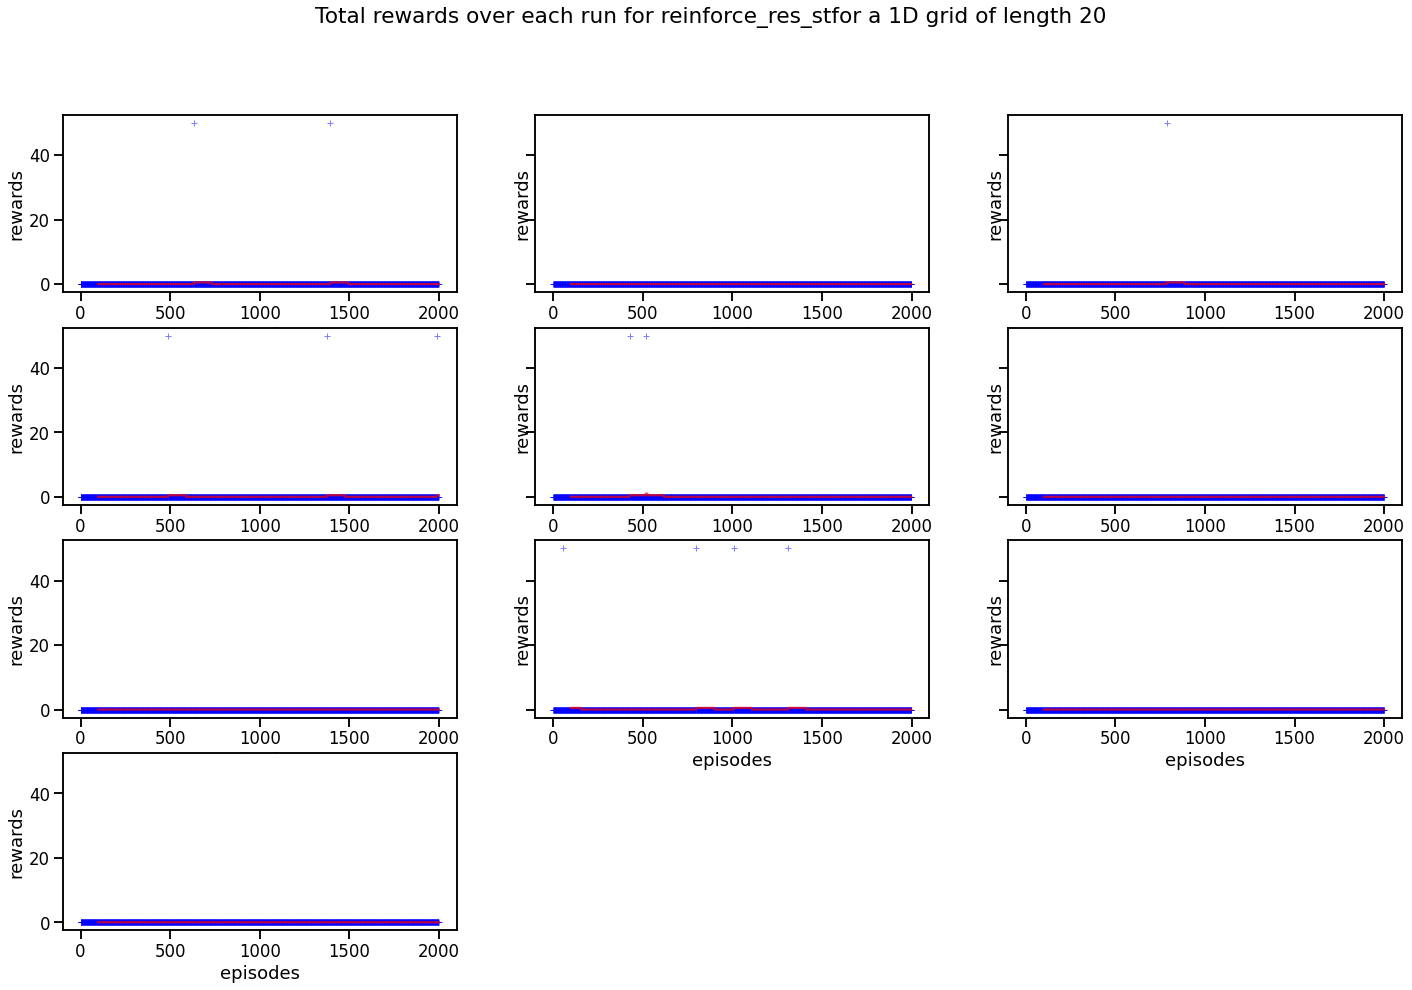

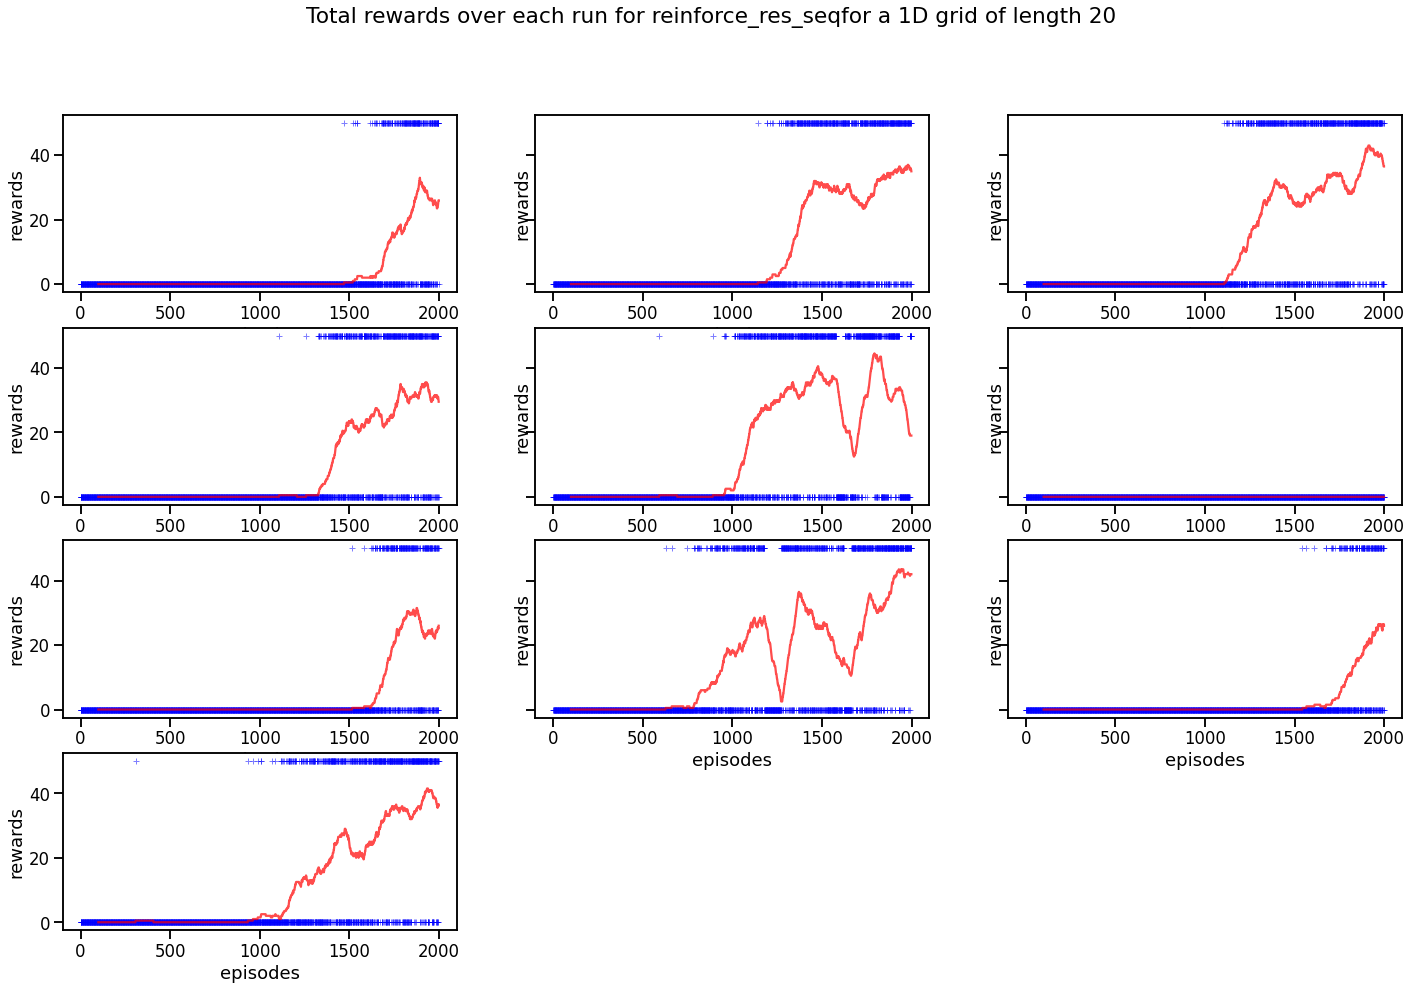

In [26]:
exp = 'data/' + 'grid_length20_1'

data = {}

algos = [x[:-4] for x in os.listdir(f'{exp}')]
algos.sort(key=lambda x: len(x))

for a in algos:
    data[a] = pd.read_csv(
        f'{exp}/{a}.csv', header=[0, 1], skipinitialspace=True)

labels = sorted(list(set(data[algos[0]].columns.get_level_values(0))))
num_runs = len(data[algos[0]].columns)

for a in algos:
    plot_scores_grid(data[a], labels[0], num_runs, a+'for a 1D grid of length 20')

In [27]:
exp = ['grid2d_length6_1', 'grid2d_sparse_length6']
exp_map = {
    'grid2d_length6_1': '6',
    'grid2d_sparse_length6': '6sparse',
}

In [28]:
algos = ['reinforce_res', 'reinforce_res_st', 'reinforce_res_seq']

mean = {}
error = {}

for a in algos:
    for e in exp:
        d = pd.read_csv(f'data/{e}/{a}.csv', header=[0, 1], skipinitialspace=True)
        mean[(exp_map[e], a)] = d.sum().mean()
        error[(exp_map[e], a)] = d.sum().std()

In [29]:
mean_upd = {a:[] for a in algos}
error_upd = {a:[] for a in algos}
for k, v in mean.items():
    mean_upd[k[1]].append(v)
for k, v in error.items():
    error_upd[k[1]].append(v)

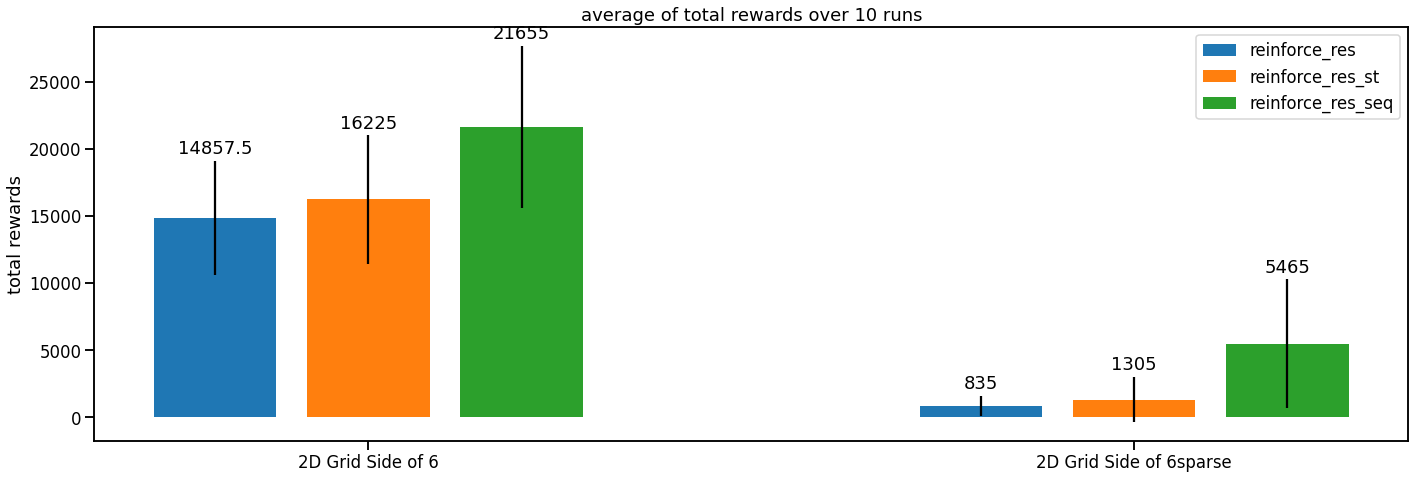

In [30]:
labels = [f'2D Grid Side of {L}' for L in exp_map.values()]
num_runs= 10
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(20, 7))

if len(algos) == 4:
    pos = [-1.5, -0.5, 0.5, 1.5]
if len(algos) == 3:
    pos = [-1, 0, 1]

for i, a in enumerate(algos):
    mean = np.array(mean_upd[a])
    error = np.array(error_upd[a])

    rect = ax.bar(x + pos[i] * width, mean, width*0.8,
                  yerr=error, ecolor='black', label=a)
    ax.bar_label(rect, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('total rewards')
ax.set_title(f'average of total rewards over {num_runs} runs')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

fig.tight_layout()

plt.show()